<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Predicting_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age - age

● bp - blood pressure

● sg - specific gravity

● al - albumin

● su - sugar

● rbc - red blood cells

● pc - pus cell

● pcc - pus cell clumps

● ba - bacteria

● bgr - blood glucose random

● bu - blood urea

● sc - serum creatinine

● sod - sodium

● pot - potassium

● hemo - hemoglobin

● pcv - packed cell volume

● wc - white blood cell count

● rc - red blood cell count

● htn - hypertension

● dm - diabetes mellitus

● cad - coronary artery disease

● appet - appetite

● pe - pedal edema

● ane - anemia

● class - class

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Initial analysis on the dataset

In [4]:
df.shape

(400, 26)

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.describe(include = 'object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
for i in df.columns:
  print('\n-------------',i,'------------------')
  print(set(df[i].tolist()))


------------- id ------------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

In [9]:
df[df['wc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
185,185,4.0,NaN,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd


In [10]:
df[df['wc']=='\t6200']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
76,76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,...,36,\t6200,4,no,yes,no,good,yes,no,ckd


In [11]:
df[df['wc']=='\t8400']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,37,\t8400,8.0,yes,no,no,good,no,no,ckd


In [12]:
df['wc'] = df['wc'].map(lambda x: np.nan if x =='\t?' else x )

In [13]:
df['wc'] = df['wc'].map(lambda x: '6200' if x =='\t6200' else x )

In [14]:
df['wc'] = df['wc'].map(lambda x: '8400' if x=='\t8400' else x )

In [15]:
df['pcv'] = df['pcv'].map(lambda x: '43' if x =='\t43' else x )

In [16]:
df[df['wc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [17]:
df['cad'] = df['cad'].map(lambda x: 'no' if x == '\tno' else x)

In [18]:
df[df['cad']=='\tno']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [19]:
df['dm'] = df['dm'].map(lambda x: 'no' if x == '\tno' else x)

In [20]:
df['dm'] = df['dm'].map(lambda x: 'yes' if x == '\tyes' else x)

In [21]:
df['dm'] = df['dm'].map(lambda x: 'yes' if x == ' yes' else x)

In [22]:
df['classification'] = df['classification'].map(lambda x: 'ckd' if x == 'ckd\t' else x)

In [23]:
for i in df.columns:
  print('\n-------------',i,'------------------')
  print(set(df[i].tolist()))


------------- id ------------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

rc, wc and pcv should be float values not object

#### Examining Missing Values

In [24]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                106
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

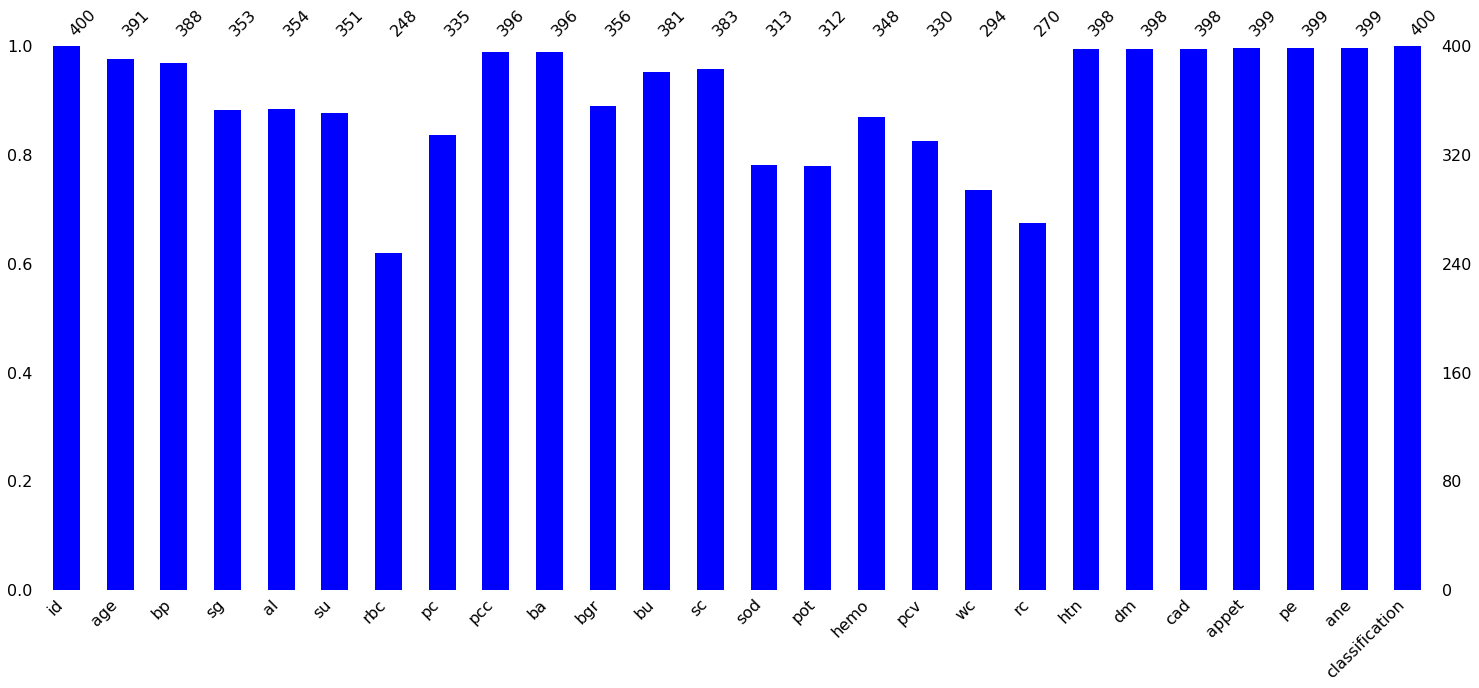

In [25]:
import missingno
missingno.bar(df, color='b')
plt.show()

In [26]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [27]:
df.groupby(['al'])['rbc'].value_counts()

al   rbc     
0.0  normal      141
     abnormal      2
1.0  abnormal     12
     normal       10
2.0  normal       17
     abnormal     12
3.0  normal       17
     abnormal     12
4.0  normal       13
     abnormal      8
5.0  abnormal      1
Name: rbc, dtype: int64

It appears that when there is no albuminn in urine it is very likely that rbc is 'normal' than 'abnormal'. Otherwise it is likely 50:50 chance to have 'normal' or 'abnormal'. 

In [28]:
df['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

We will fill missing values in the rbc column with 'normal' if the corresponding 'al' value is 0. 

In [29]:
df['rbc'] = np.where(df['al'] == 0, df['rbc'].fillna('normal'), df['rbc'])

In [30]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                96
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                106
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [31]:
idx=df.index[df.rbc.isna()]
print(len(idx))
df.loc[np.random.choice(idx, size=int(len(idx)/2) ,replace=False),'rbc']='abnormal'
df['rbc'].isnull().sum()

96


48

In [32]:
df['rbc'] = df['rbc'].fillna('normal')

In [33]:
df['rbc'].isnull().sum()

0

In [34]:
df['rc']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 400, dtype: object

In [35]:
df['rc'].astype('float')

ValueError: ignored

In [36]:
df[df['rc'] =='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,abnormal,NaN,notpresent,notpresent,...,37,6000,\t?,no,yes,no,good,no,no,ckd


In [37]:
df.loc[162, 'rc'] = np.nan

In [38]:
df.iloc[[162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,abnormal,NaN,notpresent,notpresent,...,37,6000,NaN,no,yes,no,good,no,no,ckd


In [39]:
df['rc']=df['rc'].astype('float')

In [40]:
df['rc'].describe()

count    269.000000
mean       4.707435
std        1.025323
min        2.100000
25%        3.900000
50%        4.800000
75%        5.400000
max        8.000000
Name: rc, dtype: float64

In [41]:
df['hemo'].describe()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64

In [42]:
df.groupby('hemo')['rc'].mean()

hemo
3.1     2.100000
4.8          NaN
5.5     2.800000
5.6     2.600000
5.8          NaN
          ...   
17.4    5.700000
17.5    4.700000
17.6    5.000000
17.7    5.500000
17.8    5.066667
Name: rc, Length: 115, dtype: float64

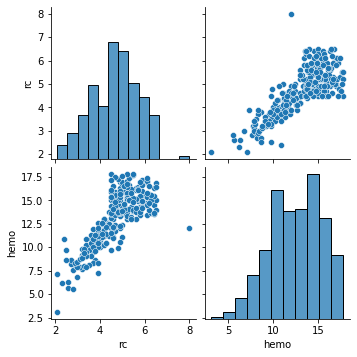

In [43]:
sns.pairplot(df[['rc', 'hemo']])

In [44]:
df['rc'] = df.groupby('hemo')['rc'].apply(lambda x:x.fillna(x.mean()))

In [45]:
df['rc']

0      5.200
1      3.825
2      3.800
3      3.900
4      4.600
       ...  
395    4.900
396    6.200
397    5.400
398    5.900
399    6.100
Name: rc, Length: 400, dtype: float64

In [46]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,333.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,4.579968
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.990329
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,3.850000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,4.600000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,5.300000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,8.000000


In [48]:
unique_number = []

for i in df.columns:
  n = df[i].value_counts().count()
  unique_number.append(n)

uni_df = pd.DataFrame(unique_number, index= df.columns, columns = ['Total Unique Values'])

In [49]:
na = df.isnull().sum()
na_df = pd.DataFrame(na, index = df.columns)

In [50]:
pd.concat([uni_df, na_df], axis=1)

,Total Unique Values,0
id,400,0
age,76,9
bp,10,12
sg,5,47
al,6,46
su,6,49
rbc,2,0
pc,2,65
pcc,2,4
ba,2,4


In [52]:
df.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'rc'],
      dtype='object')

In [53]:
df.select_dtypes(include='object').columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

In [54]:
df[['pcv','wc']]

,pcv,wc
0,44,7800
1,38,6000
2,31,7500
3,32,6700
4,35,7300
...,...,...
395,47,6700
396,54,7800
397,49,6600
398,51,7200


In [55]:
df['pcv'] = df['pcv'].astype('float')

ValueError: ignored

In [57]:
df['pcv']= df['pcv'].map(lambda x: np.nan if x == '\t?' else x)

In [58]:
df['pcv'] = df['pcv'].astype('float')

In [59]:
df['wc'] = df['wc'].astype('float')

In [60]:
df.select_dtypes(include='object').columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [64]:
df.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [61]:
pd.concat([uni_df, na_df], axis=1)

,Total Unique Values,0
id,400,0
age,76,9
bp,10,12
sg,5,47
al,6,46
su,6,49
rbc,2,0
pc,2,65
pcc,2,4
ba,2,4


In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [66]:
numeric_var = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot','hemo', 'pcv', 'wc', 'rc']

In [67]:
categoric_var = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [68]:
imputer = imputer.fit(df[numeric_var])

In [69]:
numeric_df = df[numeric_var]

In [75]:
imputed_num_df = imputer.transform(numeric_df)

In [76]:
imputed_num_df = pd.DataFrame(imputed_num_df)

In [79]:
imputed_num_df.columns = numeric_df.columns
imputed_num_df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900


In [80]:
imputed_num_df.isnull().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [81]:
imputer2 = SimpleImputer(strategy='most_frequent')

In [82]:
categoric_var_df = df[categoric_var]

In [83]:
imputed_categoric_var = imputer2.fit_transform(categoric_var_df)

In [85]:
imputed_categoric_var_df = pd.DataFrame(imputed_categoric_var)
imputed_categoric_var_df.columns = categoric_var_df.columns

In [86]:
imputed_categoric_var_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [89]:
imputed_categoric_var_df.isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [93]:
df_new = pd.concat([imputed_categoric_var_df, imputed_num_df], axis=1)

In [94]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600


In [95]:
df_new['target'] = df['classification']

In [96]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,target
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600,ckd


### EDA
Uni-variate analysis

In [101]:
numeric_var

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


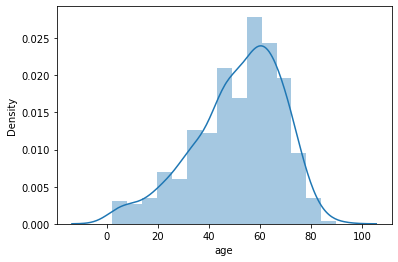

In [102]:
sns.distplot(df['age'])

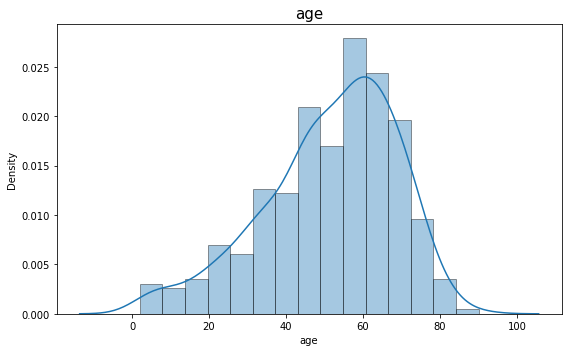

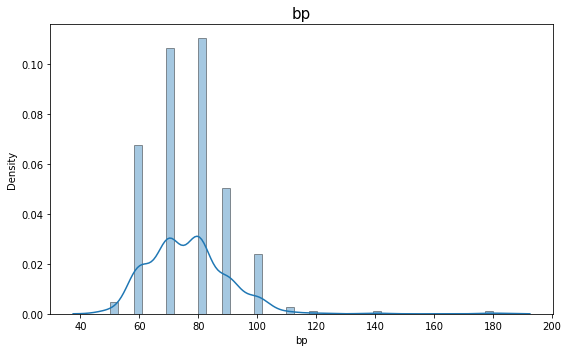

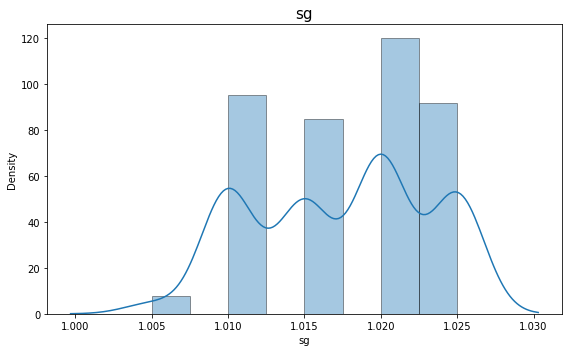

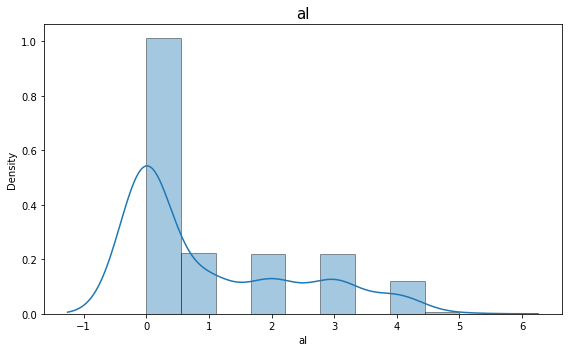

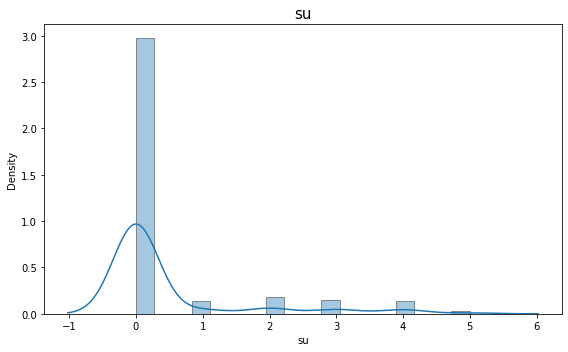

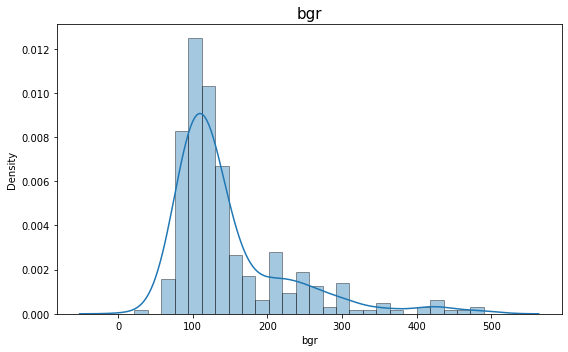

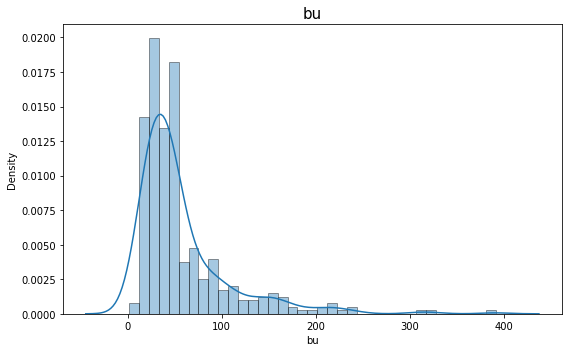

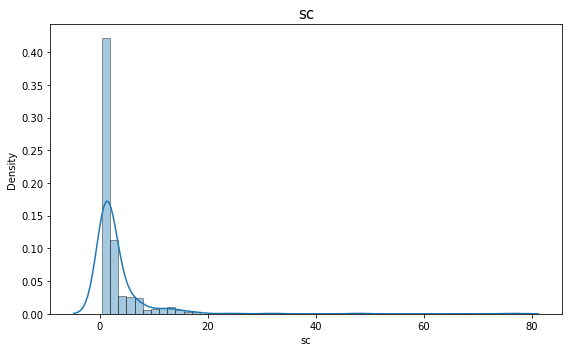

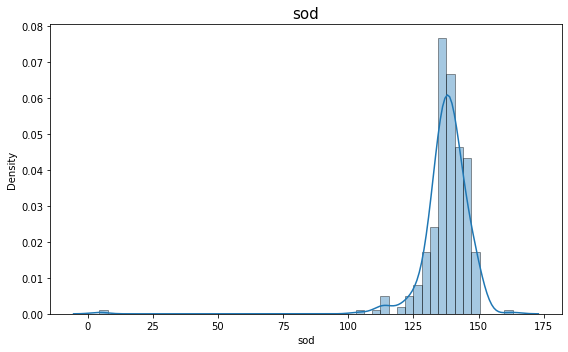

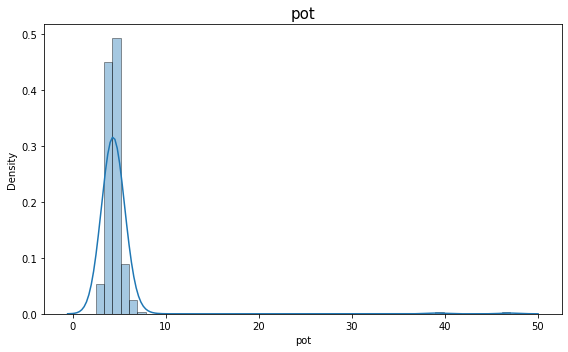

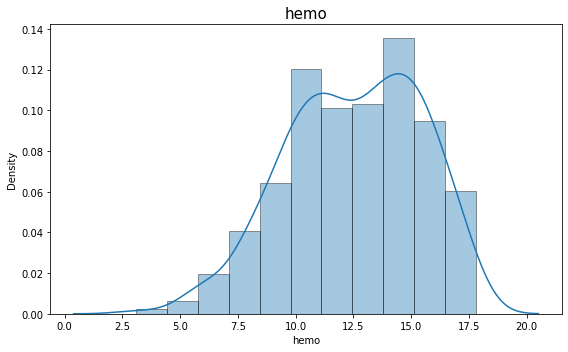

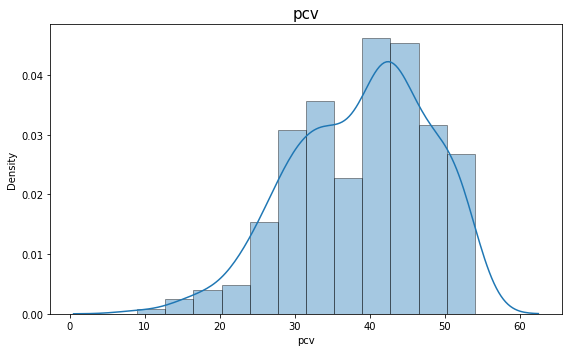

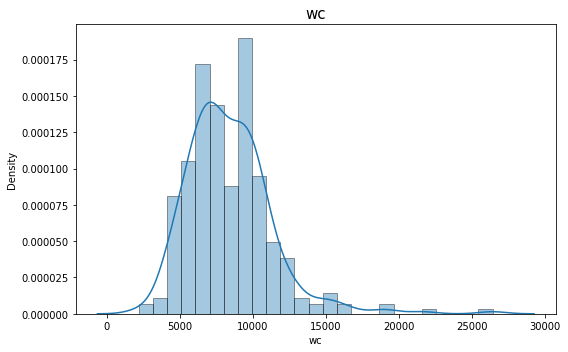

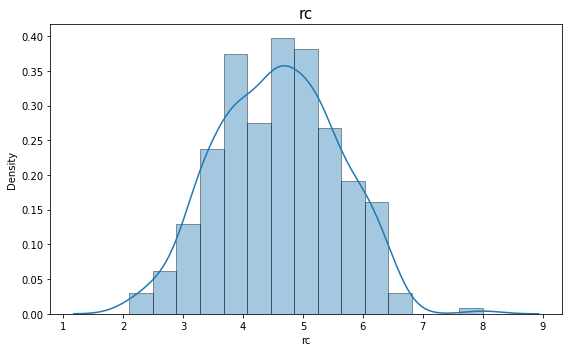

In [109]:
title_font = {'family':'arial', 'size':15}

for i in numeric_var:
  plt.figure(figsize=(8,5))
  sns.distplot(df[i], hist_kws=dict(edgecolor='k'))

  plt.title(i, fontdict = title_font)
  plt.tight_layout()
  plt.show()